In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import pandas as pd

# Use raw string (r"...") to avoid Windows path issues
df = pd.read_csv(r"C:\Users\subhashini\Downloads\bike_prices_project\bikes.csv")

# Show first few rows
print(df.head())
print(df.shape)


                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  
(7857, 8)


In [7]:
# Show total missing values in each column
print(df.isnull().sum())


model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [8]:
# See data types and structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None


In [9]:
# Drop rows with any missing data (temporary solution)
df = df.dropna()

# Confirm cleaning
print("After dropping missing values:")
print(df.isnull().sum())


After dropping missing values:
model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64


In [10]:
# Drop duplicate rows if any
df = df.drop_duplicates()

print("Data shape after removing duplicates:", df.shape)


Data shape after removing duplicates: (7796, 8)


In [11]:
# Look at first 5 rows again after cleaning
df.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
model_year,7796.0,2015.405849,3.854537,1950.0,2014.0,2016.0,2018.0,2021.0
price,7796.0,106023.323114,136443.877736,0.0,42000.0,75000.0,125000.0,3000000.0


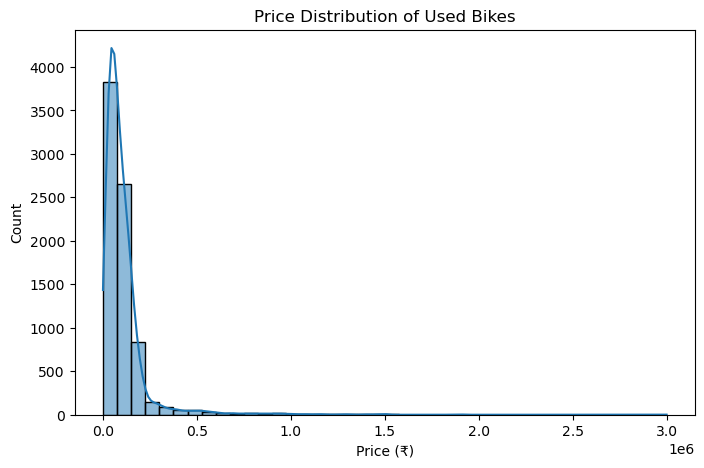

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, bins=40)
plt.title('Price Distribution of Used Bikes')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()


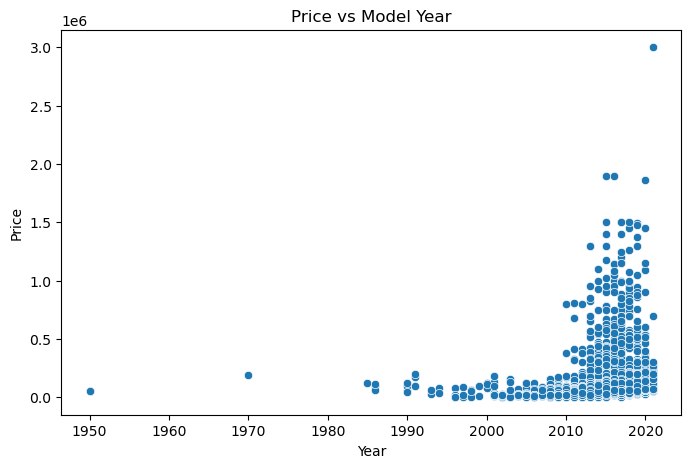

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Price vs Model Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


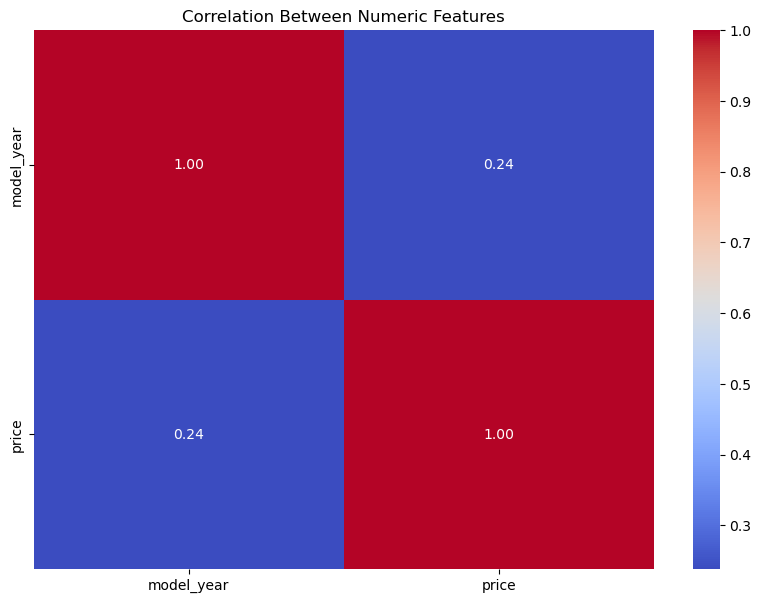

In [16]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap for numeric features only
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


In [18]:
df['bike_age'] = 2025 - df['model_year']


In [23]:
print(df.columns.tolist())


['model_name', 'model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power', 'price', 'bike_age']


In [25]:
# Clean 'power' and 'mileage' only
df['power'] = pd.to_numeric(df['power'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# Drop rows with missing power or mileage
df = df.dropna(subset=['power', 'mileage'])


In [26]:
df_encoded = pd.get_dummies(df, columns=['owner', 'location'], drop_first=True)


In [27]:
X = df_encoded.drop(['price', 'model_year', 'model_name'], axis=1)
y = df_encoded['price']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Clean kms_driven: remove 'Km' and convert to float
df['kms_driven'] = pd.to_numeric(df['kms_driven'].astype(str).str.extract('(\d+\.?\d*)')[0], errors='coerce')


In [31]:
df = df.dropna(subset=['power', 'mileage', 'kms_driven', 'price', 'bike_age'])


In [32]:
df['kms_per_year'] = df['kms_driven'] / df['bike_age']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Re-encode again if needed
df_encoded = pd.get_dummies(df, columns=['owner', 'location'], drop_first=True)

X = df_encoded.drop(['price', 'model_year', 'model_name'], axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict prices
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 4529932788.08
R² Score: 0.75


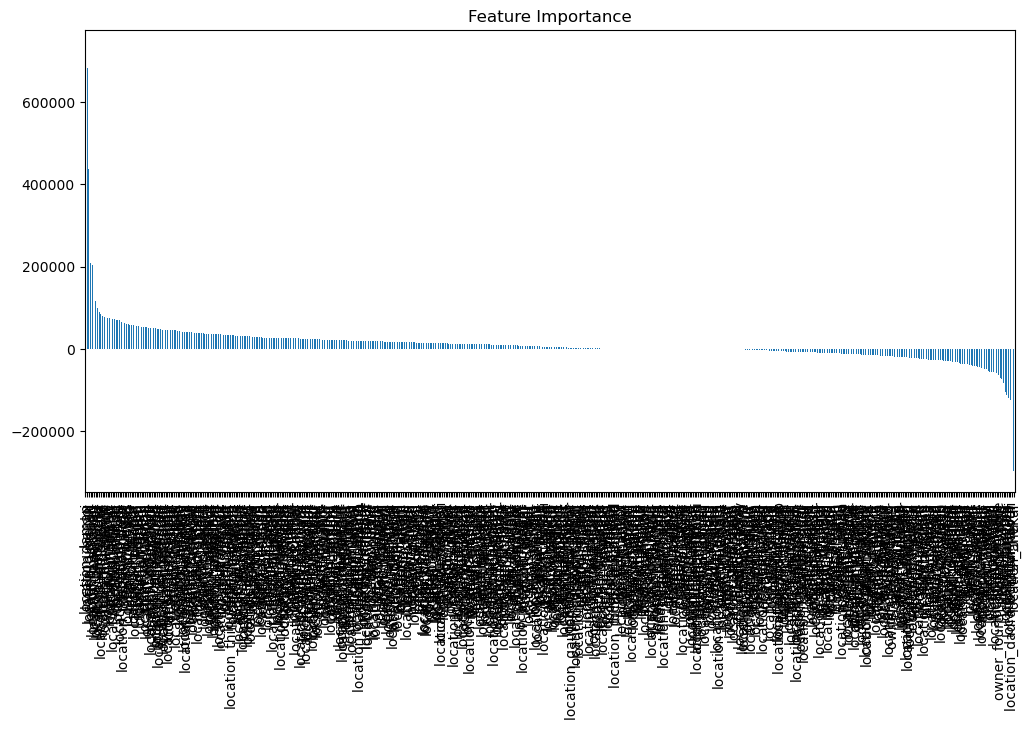

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importance")
plt.show()


<Axes: xlabel='price', ylabel='Count'>

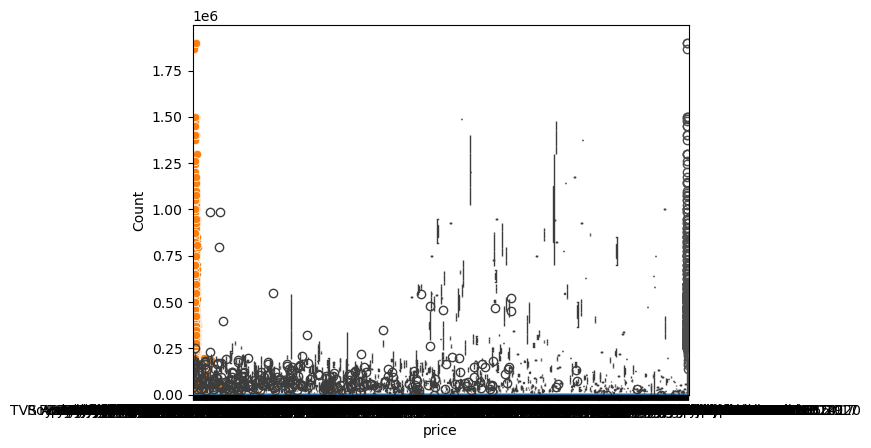

In [36]:
# 1. Price Distribution
sns.histplot(df['price'], kde=True, bins=40)

# 2. Price vs Model Year
sns.scatterplot(x='bike_age', y='price', data=df)

# 3. Boxplot: Brand vs Price
sns.boxplot(x='model_name', y='price', data=df)

# 4. Owner Type vs Price
sns.boxplot(x='owner', y='price', data=df)

# 5. Correlation Heatmap (already done)


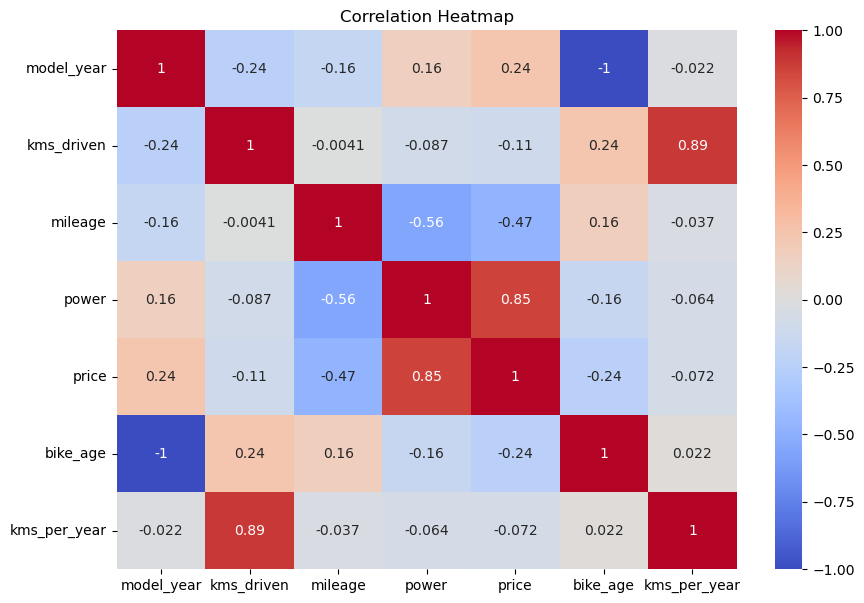

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


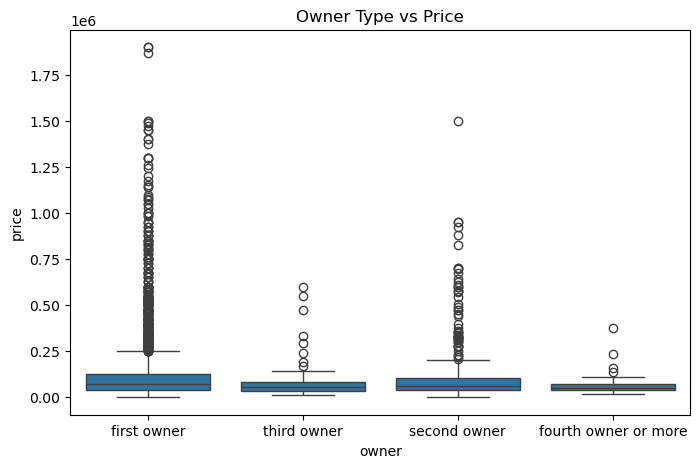

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='owner', y='price', data=df)
plt.title("Owner Type vs Price")
plt.show()


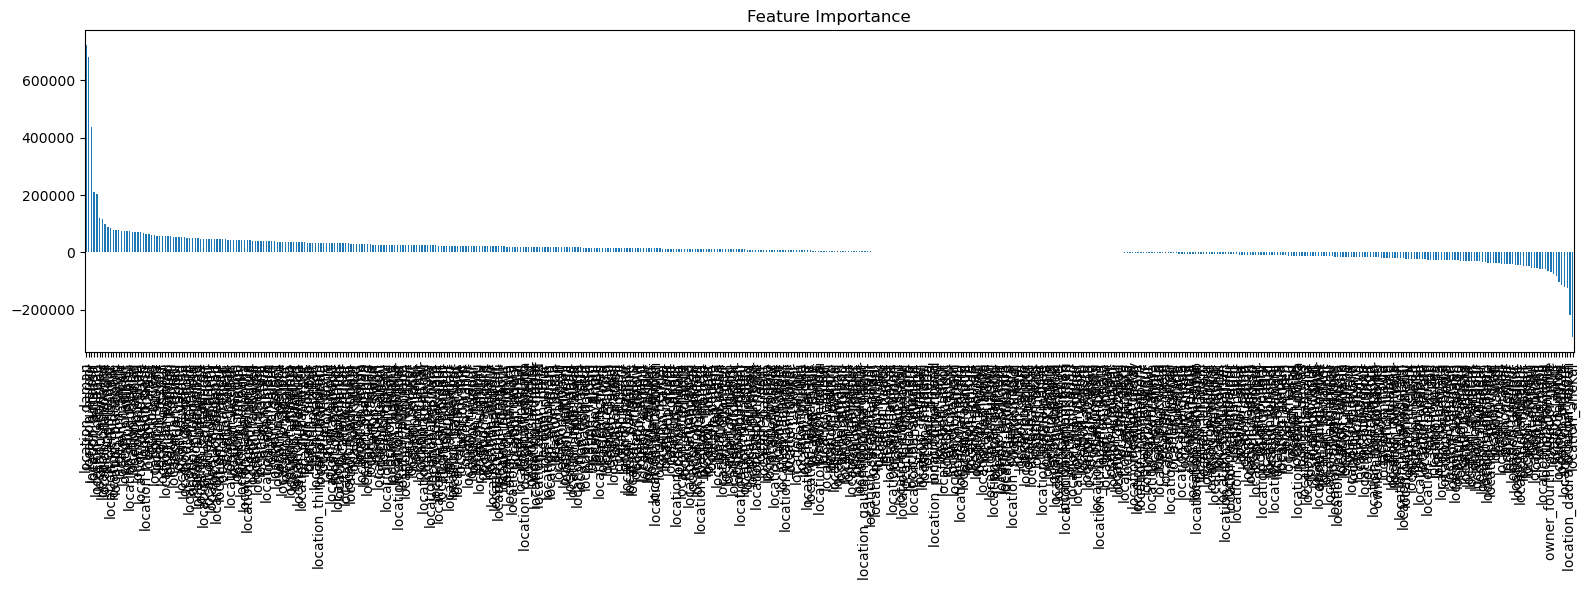

In [39]:
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(16,6), title="Feature Importance")
plt.tight_layout()
plt.show()
